## Project (C) 
### Neural Networks 

In [178]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import warnings



warnings.filterwarnings("ignore")
rs = 4

In [179]:
def data_processing(df):
    df.race.fillna(df.race.mode()[0], inplace=True)
    df.age.fillna(df.age.mode()[0], inplace=True)
    df.chlorpropamide.fillna(df.chlorpropamide.mode()[0], inplace=True)
    df.drop(['max_glu_serum', 'acetohexamide',  'change', 'tolbutamide', 'medical_specialty'], axis=1, inplace=True)
    df = pd.get_dummies(df)
    Y = df.readmitted
    df.drop(['readmitted'], axis=1, inplace=True)
    X = df
    return X, Y


In [180]:
df = pd.read_csv("D3.csv")
X, Y = data_processing(df)
X_np = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_np,Y,test_size=0.3, random_state=rs)

## Building Model 1

In [181]:
nn_model_1 = MLPClassifier(random_state=rs, verbose=1)
nn_model_1.fit(X_train, y_train)

print("Train accuracy:", nn_model_1.score(X_train, y_train))
print("Test accuracy:", nn_model_1.score(X_test, y_test))

y_pred = nn_model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(nn_model_1)

Iteration 1, loss = 0.69695643
Iteration 2, loss = 0.64691770
Iteration 3, loss = 0.64253485
Iteration 4, loss = 0.64249741
Iteration 5, loss = 0.64107099
Iteration 6, loss = 0.63893148
Iteration 7, loss = 0.63654823
Iteration 8, loss = 0.63597957
Iteration 9, loss = 0.63493854
Iteration 10, loss = 0.63370901
Iteration 11, loss = 0.63577555
Iteration 12, loss = 0.63391602
Iteration 13, loss = 0.63057088
Iteration 14, loss = 0.62903796
Iteration 15, loss = 0.62887069
Iteration 16, loss = 0.62809954
Iteration 17, loss = 0.62794788
Iteration 18, loss = 0.62671332
Iteration 19, loss = 0.62568296
Iteration 20, loss = 0.62656073
Iteration 21, loss = 0.62472502
Iteration 22, loss = 0.62397043
Iteration 23, loss = 0.62608777
Iteration 24, loss = 0.62281839
Iteration 25, loss = 0.62352387
Iteration 26, loss = 0.62367502
Iteration 27, loss = 0.62113566
Iteration 28, loss = 0.62057726
Iteration 29, loss = 0.62033701
Iteration 30, loss = 0.62105728
Iteration 31, loss = 0.61917851
Iteration 32, los

In [165]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 86, 20)], 'alpha': [0.001, 0.0001], 'activation': ['logistic', 'relu']}

nn_cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
nn_cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=4), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.001, 0.0001],
                         'hidden_layer_sizes': [(5,), (25,), (45,), (65,),
                                                (85,)]},
             return_train_score=True)

In [182]:
print("Train accuracy:", nn_cv_1.score(X_train, y_train))
print("Test accuracy:", nn_cv_1.score(X_test, y_test))

y_pred = nn_cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(nn_cv_1.best_params_)


Train accuracy: 0.6716525002759687
Test accuracy: 0.6343206696716034
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      8343
           1       0.61      0.57      0.59      7187

    accuracy                           0.63     15530
   macro avg       0.63      0.63      0.63     15530
weighted avg       0.63      0.63      0.63     15530

{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (45,)}


In [169]:
result_set = nn_cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([18.93574953, 37.63182032, 49.00220788, 56.08762901, 62.50638933,
       21.66727667, 35.62431953, 41.11873951, 48.81111016, 55.34636512,
        6.41493871, 19.27003434, 31.36609776, 42.30688813, 59.88060408,
        7.51437571, 27.66602647, 32.92190945, 44.89377446, 48.7780185 ]), 'std_fit_time': array([ 4.46330877,  1.13688423,  0.78474731,  0.52070551,  1.3332459 ,
        4.67825241,  0.86125034,  0.61052837,  0.27183185,  0.42461983,
        1.97592323,  3.55997571,  6.63139826,  5.69570748,  5.69398255,
        2.41691298,  6.00603084,  7.89660191,  6.05538746, 15.30790486]), 'mean_score_time': array([0.02599113, 0.02404046, 0.02753055, 0.03177524, 0.03048329,
       0.02009335, 0.0224196 , 0.02629404, 0.02853103, 0.02811019,
       0.01983345, 0.02009408, 0.02232935, 0.02516439, 0.05056188,
       0.02263951, 0.02366714, 0.02394125, 0.0279196 , 0.02553785]), 'std_score_time': array([0.00450177, 0.00602679, 0.00330799, 0.00467171, 0.00401384,
       0.002

Total number of models:  20


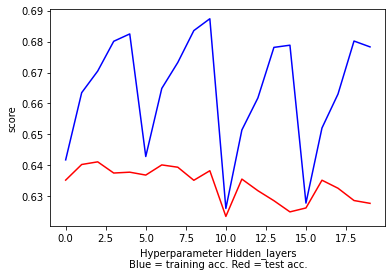

In [171]:
import matplotlib.pyplot as plt
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
# plt.xticks(range(0, len(train_result)), [""]
plt.ylabel('score')
plt.show()

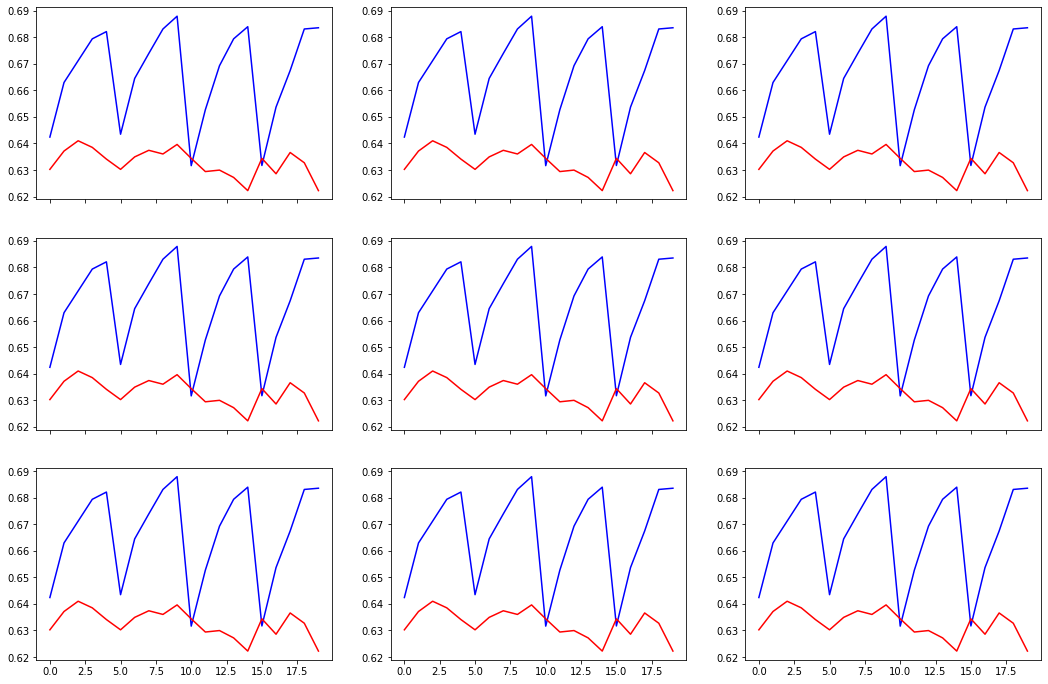

In [172]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True,
                                    figsize=(18, 12))
count = 0

for i in range(0,3):
    for j in range(0,3):
        ii = count
        train_result = result_set[f'split{ii}_train_score']
        test_result = result_set[f'split{ii}_test_score']
        # plot hidden layers hyperparameter values vs training and test accuracy score
        ax[i,j].plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
#         ax.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
#         ax[i].xticks(range(0, len(train_result)),range(5, 86, 20))
#         ax[i,j].ylabel('score')
plt.show()

Based on the gridserach, the best variables for the nueral net is 45 nodes and and alpha of 0.001 

From the Decision tree, the most importatnt variables (variables with an importance > than 0.01) are the following. 

In [ ]:
number_inpatient : 0.5847160154150457
discharge_disposition_id : 0.1599015974380108
number_emergency : 0.05631480009124843
number_outpatient : 0.0478839279662871
diabetesMed : 0.03494192905425346
number_diagnoses : 0.019512440604883895
num_medications : 0.01826039761953301
admission_type_id : 0.0171481831994704
num_lab_procedures : 0.014292740023506138
time_in_hospital : 0.013005944162757712

In [154]:
def data_processing_reduced(df):
    df.race.fillna(df.race.mode()[0], inplace=True)
    df.age.fillna(df.age.mode()[0], inplace=True)
    df.chlorpropamide.fillna(df.chlorpropamide.mode()[0], inplace=True)
    df = df[['number_inpatient','discharge_disposition_id','number_emergency','number_outpatient','diabetesMed','number_diagnoses','num_medications','admission_type_id','num_lab_procedures','time_in_hospital','age','readmitted']]
    df = pd.get_dummies(df)
    Y = df.readmitted
    df.drop(['readmitted'], axis=1, inplace=True)
    return df, Y


In [157]:
df_new = pd.read_csv("D3.csv")
X_reduced, Y_reduced = data_processing_reduced(df_new)


In [158]:
X_red_np = X_reduced.to_numpy()
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_np,Y_reduced,test_size=0.3, random_state=rs)

## Model 3
### GridSearch nn with reduced feature set

In [236]:
params = {'hidden_layer_sizes': [(x,) for x in range(25, 66, 20)], 'activation': ['logistic'], 'alpha':[0.001,0.001]}

nn_cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
nn_cv_2.fit(X_red_train, y_red_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=4), n_jobs=-1,
             param_grid={'activation': ['logistic'], 'alpha': [0.001, 0.001],
                         'hidden_layer_sizes': [(25,), (45,), (65,)]},
             return_train_score=True)

In [235]:
print("Train accuracy:", nn_cv_2.score(X_red_train, y_red_train))
print("Test accuracy:", nn_cv_2.score(X_red_test, y_red_test))

y_red_pred = nn_cv_2.predict(X_red_test)
print(classification_report(y_red_test, y_red_pred))

print(nn_cv_2.best_params_)


Train accuracy: 0.6505133016889282
Test accuracy: 0.6376690276883451
              precision    recall  f1-score   support

           0       0.63      0.78      0.70      8343
           1       0.65      0.48      0.55      7187

    accuracy                           0.64     15530
   macro avg       0.64      0.63      0.62     15530
weighted avg       0.64      0.64      0.63     15530

{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (25,)}


From here, the ideal model contains 25 nodes per hidden layer, with the logistic activation function. 
 

In [173]:
result_set = nn_cv_2.cv_results_
print(result_set)

{'mean_fit_time': array([ 5.07703583,  3.11863766,  3.86346037,  2.96841292,  3.60864995,
       11.49255195, 27.33267672, 32.15069315, 42.40188496, 47.43563125,
       12.51073613, 26.89974697, 33.97915845, 40.65953124, 47.81014659,
        5.89475496,  9.01838706, 13.11024883, 18.64699707, 27.0248791 ]), 'std_fit_time': array([0.90049564, 0.5123571 , 0.60750174, 0.64159736, 1.03060314,
       2.58633056, 2.52724849, 7.09176284, 1.29518558, 0.50590694,
       5.04903879, 4.1978218 , 3.2333756 , 3.33949551, 1.68847476,
       2.44748876, 5.81667725, 4.49396669, 4.14631277, 9.3820559 ]), 'mean_score_time': array([0.00642838, 0.00852153, 0.00804563, 0.00848396, 0.0095351 ,
       0.00755155, 0.00907741, 0.01187685, 0.01314533, 0.01638787,
       0.00921378, 0.00979543, 0.01189051, 0.01410232, 0.01758153,
       0.0078769 , 0.00736432, 0.0078578 , 0.00945971, 0.00964599]), 'std_score_time': array([0.00090799, 0.00188933, 0.00068043, 0.00088277, 0.00131089,
       0.00098216, 0.00087193, 0

Total number of models:  20


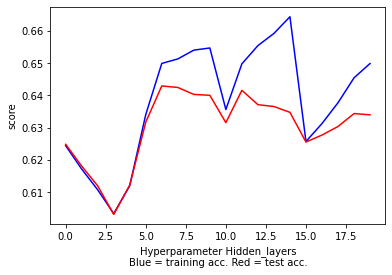

In [174]:
import matplotlib.pyplot as plt
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
# plt.xticks(range(0, len(train_result)), [""]
plt.ylabel('score')
plt.show()

## ROC Curves

In [185]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = nn_model_1.predict_proba(X_test)

y_pred_proba_cv_1 = nn_cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = nn_cv_2.predict_proba(X_red_test)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_red_test, y_pred_proba_cv_2[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_red_test, y_pred_proba_cv_2[:,1])

ROC index on test for NN_default: 0.6695892261289691
ROC index on test for NN with gridsearch 1: 0.6877682664511003
ROC index on test for NN with gridsearch 2: 0.6916752051132583


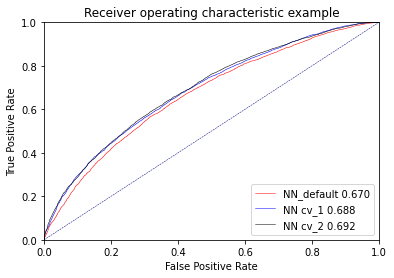

In [187]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='black', lw=0.5)





plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


From the ROC curve for the NN's we can see that eventhough the default model had the best prediction score for the training data, it had the worst ROC Index value of 0.67. 

using Gridsearch for layer size, alpha and activation on the non reduced dataset proved to improve the ROC curve, resulting in an index of 0.688.  This model was found to be most affective with a node count of 45, alpha of 0.001, and a logistic activation funciton.

Reducing the features to the most useful once (found by the decision tree) increased the ROC again up to 0.692. This model was found to be most affective with a node count of 25, alpha of 0.001, and a logistic activation funciton. 

We were able to reduce the number of nodes in the hidden layer as the fatures were dramatically reduced. This allowed us to train the nodes more effectively as the feature per node was much lower in this mode (from 65 to 20 features)nn. This reduces computation time and also creates a more useful model. 




[array([[ 0.43451036,  0.04773218,  0.21414534, ..., -0.30934897,
         -0.02894089,  0.02713085],
        [-0.15314837, -0.02012093, -0.24284077, ...,  0.26582302,
         -0.02049974, -0.08154934],
        [-0.50408063, -0.56094146, -0.1092848 , ...,  0.22463906,
         -0.00584236, -0.18216797],
        ...,
        [ 0.37631452,  0.30412587,  0.22667368, ..., -0.27493061,
         -0.07241368, -0.45404441],
        [-0.17075297,  0.36257567,  0.24469889, ..., -0.83548403,
         -0.15228561,  0.46686543],
        [ 0.55508641, -0.69633905,  0.82524954, ...,  0.24133286,
          0.10020397, -0.4416101 ]]),
 array([[ 6.69551746e-001],
        [ 1.23699595e+000],
        [-7.91215069e-001],
        [ 5.40463656e-001],
        [-9.65837764e-001],
        [ 1.60727977e+000],
        [-2.38286280e+000],
        [ 1.08671093e+000],
        [-2.45405846e-001],
        [-3.36501517e-001],
        [-4.85260703e-001],
        [ 1.76952510e-066],
        [ 3.81876259e-001],
        [

In [233]:
nn_model_2 = MLPClassifier(random_state=rs, verbose=1, max_iter=700, alpha=0.0001, hidden_layer_sizes=(25,), activation='logistic')
nn_model_2.fit(X_red_train, y_red_train)

print("Train accuracy:", nn_model_2.score(X_red_train, y_red_train))
print("Test accuracy:", nn_model_2.score(X_red_test, y_red_test))

y_pred = nn_model_2.predict(X_red_test)
print(classification_report(y_red_test, y_pred))

print(nn_model_1)

Iteration 1, loss = 0.69257986
Iteration 2, loss = 0.66058916
Iteration 3, loss = 0.65033435
Iteration 4, loss = 0.64594959
Iteration 5, loss = 0.64415270
Iteration 6, loss = 0.64314423
Iteration 7, loss = 0.64162146
Iteration 8, loss = 0.64136818
Iteration 9, loss = 0.64093009
Iteration 10, loss = 0.64045380
Iteration 11, loss = 0.63965772
Iteration 12, loss = 0.63930150
Iteration 13, loss = 0.63891007
Iteration 14, loss = 0.63891905
Iteration 15, loss = 0.63822760
Iteration 16, loss = 0.63865356
Iteration 17, loss = 0.63760583
Iteration 18, loss = 0.63732225
Iteration 19, loss = 0.63722744
Iteration 20, loss = 0.63634817
Iteration 21, loss = 0.63647634
Iteration 22, loss = 0.63624313
Iteration 23, loss = 0.63565574
Iteration 24, loss = 0.63519029
Iteration 25, loss = 0.63537326
Iteration 26, loss = 0.63456473
Iteration 27, loss = 0.63476137
Iteration 28, loss = 0.63496756
Iteration 29, loss = 0.63418501
Iteration 30, loss = 0.63372340
Iteration 31, loss = 0.63371616
Iteration 32, los

unforuntnately we cannot look at which feature was the most valuable in terms of predicting the model. That is where using a neural network can become a short coming. The black box natures means that we cannot know which variable is more important. We can look at the coeeficients of the model to see which node is the most important though. 

In [219]:
values = nn_model_2.coefs_[1]
max_v = 0
max_2 = 0
idx = 0
idx_2 = 0
for i in range(0,len(values)):
    if values[i] > max_v:
        max_2 = max_v
        idx_2 = idx
        max_v = values[i]
        idx = i

print(f'max val:{max_v} at idx:{idx}')
print(f'end max val:{max_2} at idx:{idx_2}')

max val:[1.99170518] at idx:4
end max val:[0.32915492] at idx:3


From here, we can see that the most important node happens at index 4 with a value of 1.99170518. This mean the 5th node adds the most value in to the model. The second most important is node 4 (index of 3) with a value of 0.32915492. 

ROC index on test for NN_default: 0.6921938576852632


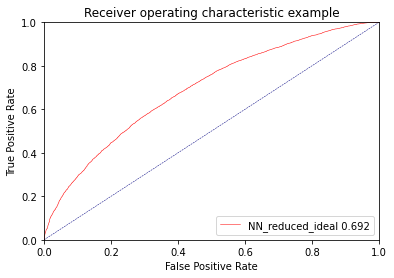

In [220]:
y_pred_proba_nn_2 = nn_model_2.predict_proba(X_red_test)
roc_index_nn_2 = roc_auc_score(y_red_test, y_pred_proba_nn_2[:, 1])
print("ROC index on test for NN_default:", roc_index_nn_2)
fpr_nn_2, tpr_nn_2, thresholds_nn_2 =  roc_curve(y_red_test, y_pred_proba_nn_2[:,1])



plt.plot(fpr_nn_2, tpr_nn_2, label='NN_reduced_ideal {:.3f}'.format(roc_index_nn_2), color='red', lw=0.5)




plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

This is a pretty curve 

In [221]:
nn_model_3 = MLPClassifier(random_state=rs, verbose=1, max_iter=700)
nn_model_3.fit(X_train, y_train)

print("Train accuracy:", nn_model_3.score(X_train, y_train))
print("Test accuracy:", nn_model_3.score(X_test, y_test))

y_pred = nn_model_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(nn_model_3)

Iteration 1, loss = 0.69695643
Iteration 2, loss = 0.64691770
Iteration 3, loss = 0.64253485
Iteration 4, loss = 0.64249741
Iteration 5, loss = 0.64107099
Iteration 6, loss = 0.63893148
Iteration 7, loss = 0.63654823
Iteration 8, loss = 0.63597957
Iteration 9, loss = 0.63493854
Iteration 10, loss = 0.63370901
Iteration 11, loss = 0.63577555
Iteration 12, loss = 0.63391602
Iteration 13, loss = 0.63057088
Iteration 14, loss = 0.62903796
Iteration 15, loss = 0.62887069
Iteration 16, loss = 0.62809954
Iteration 17, loss = 0.62794788
Iteration 18, loss = 0.62671332
Iteration 19, loss = 0.62568296
Iteration 20, loss = 0.62656073
Iteration 21, loss = 0.62472502
Iteration 22, loss = 0.62397043
Iteration 23, loss = 0.62608777
Iteration 24, loss = 0.62281839
Iteration 25, loss = 0.62352387
Iteration 26, loss = 0.62367502
Iteration 27, loss = 0.62113566
Iteration 28, loss = 0.62057726
Iteration 29, loss = 0.62033701
Iteration 30, loss = 0.62105728
Iteration 31, loss = 0.61917851
Iteration 32, los

In [222]:
0.575


0.004633590000000076

10

In [226]:
]

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=4), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (25,), (45,), (65,),
                                                (85,)],
                         'max_iter': [100, 200, 400, 700]},
             return_train_score=True)

In [240]:
import pickle5 as pickle


In [255]:
fpr_lr = np.load('fpr_cv.npy')
tpr_lr= np.load('tpr_cv.npy')
thresholds_lr= np.load('roc_index_cv.npy')
file = open('DT.pickle', 'rb')
dt = pickle.load(file)
file.close


<function BufferedReader.close>

In [256]:
roc_dt = dt[1]
fpr_dt = dt[2]
tpr_dt = dt[3]

# Part 5 - Comparison

ROC index on test for NN_default: 0.6913273131343516


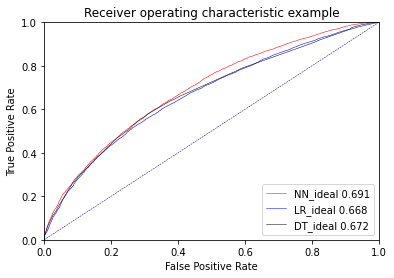

In [258]:
y_pred_proba_nn_2 = nn_model_2.predict_proba(X_red_test)
roc_index_nn_2 = roc_auc_score(y_red_test, y_pred_proba_nn_2[:, 1])
print("ROC index on test for NN_default:", roc_index_nn_2)


fpr_nn_2, tpr_nn_2, thresholds_nn_2 =  roc_curve(y_red_test, y_pred_proba_nn_2[:,1])




plt.plot(fpr_nn_2, tpr_nn_2, label='NN_ideal {:.3f}'.format(roc_index_nn_2), color='red', lw=0.5)
plt.plot(fpr_lr, tpr_lr, label='LR_ideal {:.3f}'.format(thresholds_lr), color='blue', lw=0.5)
plt.plot(fpr_dt, tpr_dt, label='DT_ideal {:.3f}'.format(roc_dt), color='black', lw=0.5)




plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()